# Worksheet 18

Name:  Erwin Pimentel
UID: U97810050

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

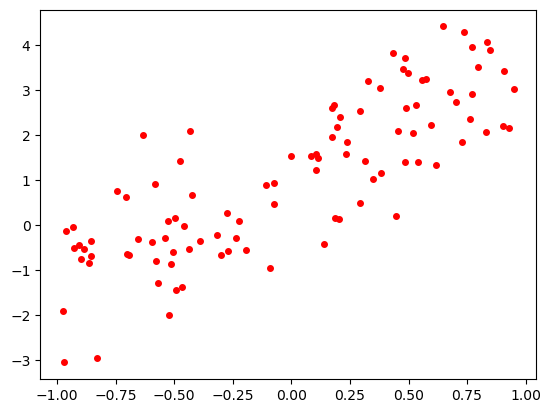

In [2]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

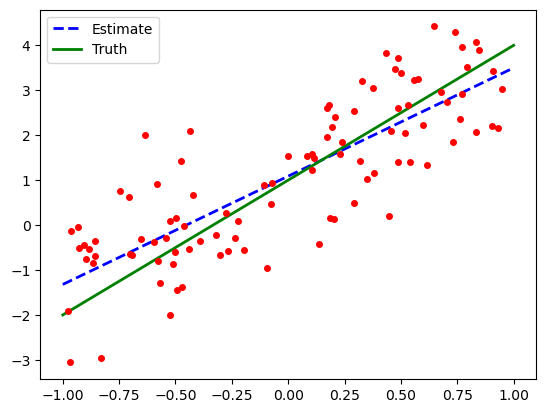

In [3]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimates of beta are approximately [0.99, 0.20]. Compared to the parameters used to generate the data, which were [1, 0.5], there is a slight underestimation. 

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

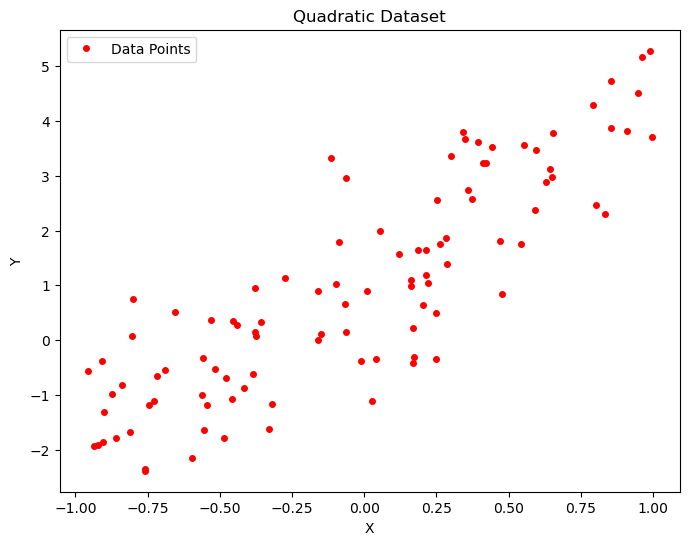

In [4]:
# Define the true coefficients for the underlying quadratic relationship
true_beta_quadratic = np.array([1, 3, 0.5])

# Generate random x values
x_quadratic = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)

# Calculate y values based on the true coefficients and random noise
y_quadratic = true_beta_quadratic[0] + true_beta_quadratic[1] * x_quadratic + true_beta_quadratic[2] * x_quadratic**2 + np.random.randn(SAMPLE_SIZE)

# Plot the generated points for the quadratic relationship
plt.figure(figsize=(8, 6))
plt.plot(x_quadratic, y_quadratic, 'ro', markersize=4, label='Data Points')
plt.title('Quadratic Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

e) Plot the least squares estimate line through the scatter plot.

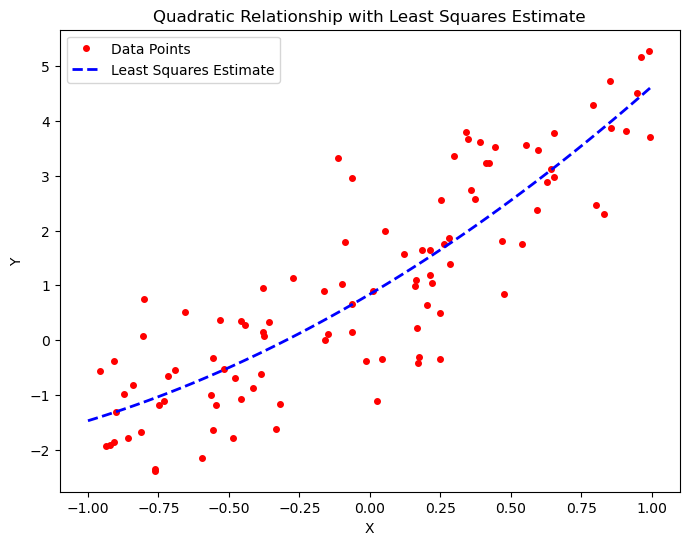

In [5]:
# Since we have a quadratic relationship, we need to include the x^2 term in our design matrix
intercept = np.ones(SAMPLE_SIZE)
X_quadratic = np.array([intercept, x_quadratic, x_quadratic**2]).T

# Calculate the least squares estimate for the quadratic model
beta_hat_quadratic = np.linalg.inv(X_quadratic.T @ X_quadratic) @ X_quadratic.T @ y_quadratic

# Generate a sequence of x values for plotting the estimate line
x_plot_quadratic = np.linspace(-1, 1, 100)

# Calculate the estimated y values for the quadratic model
y_est_quadratic = beta_hat_quadratic[0] + beta_hat_quadratic[1] * x_plot_quadratic + beta_hat_quadratic[2] * x_plot_quadratic**2

# Plot the generated points and the least squares estimate line
plt.figure(figsize=(8, 6))
plt.plot(x_quadratic, y_quadratic, 'ro', markersize=4, label='Data Points')
plt.plot(x_plot_quadratic, y_est_quadratic, 'b--', lw=2, label='Least Squares Estimate')
plt.title('Quadratic Relationship with Least Squares Estimate')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimated coefficients for the quadratic model are approximately [0.79, 2.97, 0.41]. The ones we used for the data are [1, 3, 0.5]. The estimated intercept is 0.79, slightly less than the true intercept of 1.
The estimated coefficient for the linear term is 2.97, which is very close to the true coefficient of 3. The estimated coefficient for the quadratic term is 0.41, again slightly less than the true coefficient of 0.5. The estimates are relatively close to the true parameters, indicating that the least squares method has done a good job of estimating the underlying quadratic relationship despite the presence of noise in the data.

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

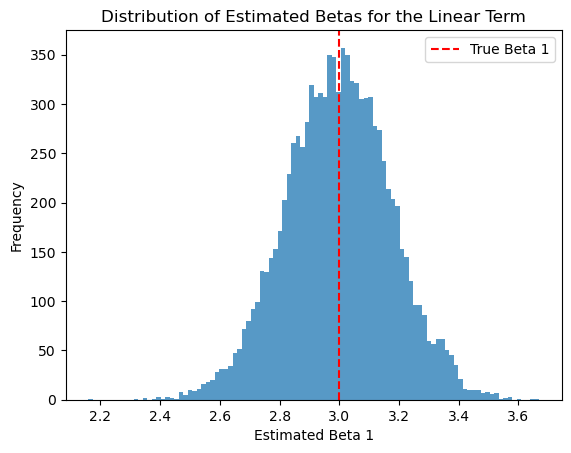

array([1.00177   , 2.99638383, 0.49405821])

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of repetitions
repetitions = 10000
# Define the true coefficients for the underlying quadratic relationship
true_beta = np.array([1, 3, 0.5])

# Initialize an empty list to store the estimated betas
betas = []

# Repeat the experiment a large number of times
for _ in range(repetitions):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    # Generate y based on the quadratic relationship with noise
    y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x, x**2]).T
    # Append the estimated beta for this iteration
    betas.append(np.linalg.inv(X.T @ X) @ X.T @ y)

# Convert the list of betas to a NumPy array for easier handling
betas = np.array(betas)

# Plot histogram of the estimated coefficients for the linear term (true_beta[1])
plt.hist(betas[:, 1], bins=100, alpha=0.75)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed', label='True Beta 1')
plt.title('Distribution of Estimated Betas for the Linear Term')
plt.xlabel('Estimated Beta 1')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Output the mean of the estimated betas
np.mean(betas, axis=0)